In [115]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import math

In [150]:
#constants
n=11

In [151]:
#basis
x = []; y=[]
for i in range(n+1):
    temp = ((2*i)/n)-1
    x.append(temp)
    y.append(1/(1+25*temp*temp))
print(x)
print(len(x))
print(y)
print(len(y))

poly = lagrange(x, y)

[-1.0, -0.8181818181818181, -0.6363636363636364, -0.4545454545454546, -0.2727272727272727, -0.09090909090909094, 0.09090909090909083, 0.2727272727272727, 0.4545454545454546, 0.6363636363636365, 0.8181818181818181, 1.0]
12
[0.038461538461538464, 0.05638397017707363, 0.08989598811292719, 0.1621983914209115, 0.34971098265895956, 0.8287671232876711, 0.8287671232876715, 0.34971098265895956, 0.1621983914209115, 0.08989598811292716, 0.05638397017707363, 0.038461538461538464]
12


In [152]:
#chebyshev
x_che=[]; y_che=[]
n_che = n+1
for i in range(1, n_che+1):
    temp = np.cos(np.pi*(2*i-1)/(2*n_che))
    x_che.append(temp)
    
    temp_ = 1/(1+25*temp*temp)
    y_che.append(temp_)

print(x_che)
print(len(x_che))
print(y_che)
print(len(y_che))

poly_che = lagrange(x_che, y_che)

[0.9914448613738104, 0.9238795325112867, 0.7933533402912352, 0.6087614290087207, 0.38268343236508984, 0.1305261922200517, -0.1305261922200516, -0.3826834323650895, -0.6087614290087207, -0.793353340291235, -0.9238795325112867, -0.9914448613738104]
12
[0.03910210183186613, 0.044765092294532106, 0.05975415444876194, 0.09742067144017927, 0.21453862919406327, 0.7012980887569082, 0.7012980887569087, 0.21453862919406358, 0.09742067144017927, 0.05975415444876197, 0.044765092294532106, 0.03910210183186613]
12


In [153]:
# spline
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, y)

In [154]:
## bernstein polynomial
from scipy.interpolate import BPoly
import operator as op
from functools import reduce

def nCr(n, r):
    if n < 1 or r < 0 or n < r:
        raise ValueError
    r = min(r, n-r)
    numerator = reduce(op.mul, range(n, n-r, -1), 1)
    denominator = reduce(op.mul, range(1, r+1), 1)
    return numerator / denominator

print(nCr(3, 2))
def b(v,n,x):
    combi = nCr(n,v)
    temp = combi*(x**(v))*((1-x)**(n-v))
    return temp

def f(x):
    temp = 1/(1+25*x*x)
    return temp

def B(n,x):
    s = 0
    for v in range(n+1): # 0, .., n
        temp = f(v/n)*b(v,n,x)
        s = s + temp
    return s

y_bern = []
for x_temp in x:
    y_bern.append(B(n,x_temp))

print(y_bern)
print(len(y_bern))

x_bp=[]
for i in range(n+1):
    x_bp.append(i)
print(x_bp)

# considering bernstein polynomial doesn't fit for [-1,0)
# arbitarily made symmetric
y_bern_sym = []
l = len(y_bern)
for i in range(l):
    if(i<(l/2)):
        y_bern_sym.append(y_bern[l-1-i])
    else:
        y_bern_sym.append(y_bern[i])
print(y_bern_sym)

3.0
[-268.1317705362784, -101.56924116475632, -32.3121890270934, -7.286749429437977, -0.08620290916437234, 1.0922937507091564, 0.7987576065780745, 0.42016846431261595, 0.20342577904422118, 0.10413606581409253, 0.059969773437122516, 0.038461538461538464]
12
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.038461538461538464, 0.059969773437122516, 0.10413606581409253, 0.20342577904422118, 0.42016846431261595, 0.7987576065780745, 0.7987576065780745, 0.42016846431261595, 0.20342577904422118, 0.10413606581409253, 0.059969773437122516, 0.038461538461538464]


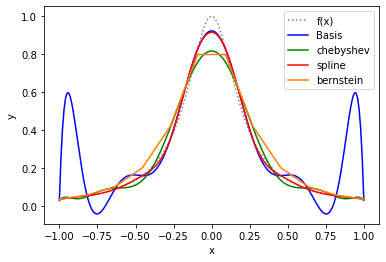

<Figure size 432x576 with 0 Axes>

In [157]:
# final plot
x_new = np.arange(-1.0, 1.01, 0.01)
x_basis=[]; y_basis=[]
for x_ in x_new:
    x_basis.append(x_)
    y_basis.append(f(x_))
plt.plot(x_basis, y_basis, 'gray', label='f(x)', linestyle=':')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), 'b', label='Basis')
plt.plot(x_new, Polynomial(poly_che.coef[::-1])(x_new), 'g', label='chebyshev')
plt.plot(x_new, cs(x_new),'r', label="spline")
plt.plot(x, y_bern_sym, color='#ff7f0e', label="bernstein")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.figure(figsize=(6,8))
plt.show()

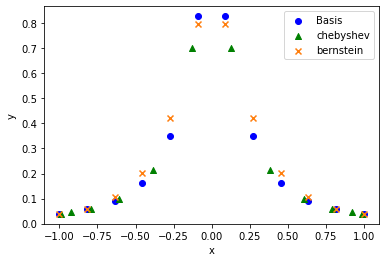

<Figure size 432x576 with 0 Axes>

In [158]:
# data points scattering
plt.scatter(x, y, color='b', label='Basis', marker='o')
plt.scatter(x_che, y_che, color='g', label='chebyshev', marker='^')
plt.scatter(x, y_bern_sym, color='#ff7f0e', label="bernstein", marker='x')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.figure(figsize=(6,8))
plt.show()